<a href="https://colab.research.google.com/github/Udinkosd/Data-Mining-2024/blob/main/Check_Point_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Gaji Mahasiswa

#**IMPORT LIBRARY**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import KFold

#**MODELLING**

##**Modelling Predict**

##**Select Modelling Techniques**

Dalam pemilihan teknik pemodelan, diputuskan untuk menggunakan metode **Clustering** atau **pengelompokan** untuk menganalisis data ini. Teknik ini dipilih berdasarkan pemahaman bisnis bahwa tujuan utama analisis adalah untuk mengidentifikasi pola atau kelompok yang ada dalam data. Dengan fokus pada atribut usia, tahun pengalaman, gaji, dan kategori jabatan, metode clustering dapat membantu mengelompokkan individu ke dalam kategori yang memiliki karakteristik serupa.

### **Algoritma yang dipakai**

#### **Algoritma K-Means**

Algoritma K-Means adalah salah satu metode clustering yang paling umum digunakan dalam analisis data. Tujuannya adalah untuk membagi dataset menjadi beberapa kelompok atau cluster berdasarkan pola atau kemiripan antar data.

Misalnya, dengan menggunakan algoritma K-Means, kita dapat mengelompokkan karyawan berdasarkan karakteristik seperti usia, pengalaman kerja, dan gaji yang diterima.

#### **Algoritma Hierarchical Clustering**

Algoritma Hierarchical Clustering dapat digunakan untuk mengelompokkan individu-individu dalam dataset ke dalam struktur hirarkis berdasarkan tingkat kemiripan antara mereka.

Misalnya, dengan menggunakan algoritma Hierarchical Clustering, kita dapat membangun pohon dendrogram yang menunjukkan hubungan hierarkis antara kelompok-kelompok karyawan berdasarkan karakteristik seperti usia, pengalaman kerja, dan gaji yang diterima.

###**Pre-Processing**

In [12]:
url = 'https://raw.githubusercontent.com/Udinkosd/Data-Mining-2024/main/Data%20Cleaned.csv'
df2 = pd.read_csv(url)
df2

,Age,Years of Experience,Salary,JobCategory,AgeCategory,AgeCategory_1,Gender_Female,Gender_Male,JobCategory_0,JobCategory_1,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,43.0,19.0,170000.0,5,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29.0,2.0,40000.0,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,34.0,7.0,90000.0,5,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Splitting Data**

In [13]:
X = df2[['Age', 'Years of Experience', 'Salary']]
y = df2['JobCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
y_train.value_counts(normalize=True)

5    0.900763
1    0.030534
4    0.026718
3    0.019084
0    0.015267
2    0.007634
Name: JobCategory, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

5    0.893805
1    0.044248
0    0.026549
3    0.017699
4    0.008850
2    0.008850
Name: JobCategory, dtype: float64

Pada tahap ini, data dibagi menjadi dua subset: data latih (training data) dan data uji (testing data). Tujuan dari splitting data adalah untuk melatih model pada data latih dan menguji performanya pada data uji. Data latih digunakan untuk melatih model sehingga dapat belajar pola-pola yang terdapat dalam data. Setelah model dilatih, data uji digunakan untuk menguji seberapa baik model tersebut dapat memprediksi label atau nilai target pada data yang tidak pernah dilihat sebelumnya. Hal ini penting untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada data baru yang ditemui di masa depan.

#### **Normalizing data**

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tahap normalisasi data dilakukan untuk mengubah skala semua fitur dalam dataset sehingga memiliki rentang nilai yang seragam atau terstandarisasi. Dengan normalisasi data, kita dapat memastikan bahwa perbedaan skala antar fitur tidak memengaruhi performa model, serta mempercepat proses konvergensi dalam algoritma pembelajaran mesin yang sensitif terhadap skala.

### **Build and Train Model**

#### **K-Means**

In [17]:
imputer = SimpleImputer(strategy='mean')

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Setelah normalisasi data, kita melatih model K-Means menggunakan data latih yang telah dinormalisasi. Model ini kemudian dapat digunakan untuk mengelompokkan atau mengklasifikasikan data uji atau data baru yang memiliki fitur-fitur yang serupa ke dalam cluster yang sesuai, berdasarkan pola yang telah dipelajari selama proses pelatihan.

#### **Hierarchical Clustering**

In [19]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(X_train_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Model Hierarchical Clustering akan dilatih menggunakan data latih yang telah dinormalisasi. Model ini kemudian dapat digunakan untuk mengelompokkan atau mengklasifikasikan data uji atau data baru yang memiliki fitur-fitur yang serupa ke dalam cluster yang sesuai, berdasarkan struktur hierarki yang telah dipelajari selama proses pelatihan.


###**Begins and Compare Predict**

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

kmn_pred = kmeans.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
kmn_pred = kmeans.predict(X_test_scaled)

hrc_pred = hc.fit_predict(X_test_imputed)

x_test = pd.DataFrame(X_test, columns=['Age', 'Years of Experience', 'Salary'])

kmn_col = pd.DataFrame(kmn_pred, columns=["kmeans_cluster"])
hrc_col = pd.DataFrame(hrc_pred, columns=["hierarchical_cluster"])

combined_data = pd.concat([x_test, kmn_col, hrc_col], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [22]:
x_test.reset_index(drop=True, inplace=True)
kmn_col.reset_index(drop=True, inplace=True)
hrc_col.reset_index(drop=True, inplace=True)

combined_data = pd.concat([x_test, kmn_col, hrc_col], axis=1)

combined_data.drop(columns=['index'], inplace=True, errors='ignore')

print(combined_data.head())

    Age  Years of Experience    Salary  kmeans_cluster  hierarchical_cluster
0  46.0                 18.0  150000.0               2                     0
1  39.0                 10.0   65000.0               0                     1
2  44.0                 16.0  125000.0               2                     0
3  34.0                  6.0   80000.0               0                     1
4  43.0                 17.0  140000.0               2                     0


In [23]:
combined_data.head()

,Age,Years of Experience,Salary,kmeans_cluster,hierarchical_cluster
0,46.0,18.0,150000.0,2,0
1,39.0,10.0,65000.0,0,1
2,44.0,16.0,125000.0,2,0
3,34.0,6.0,80000.0,0,1
4,43.0,17.0,140000.0,2,0


In [24]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

kmn_col = pd.DataFrame(kmn_pred.astype(int), columns=["kmn_prediction"])
hrc_col = pd.DataFrame(hrc_pred.astype(int), columns=["hrc_prediction"])

combined_data = pd.concat([x_test, y_test, kmn_col, hrc_col], axis=1)

In [25]:
combined_data.sample(10)

,Age,Years of Experience,Salary,JobCategory,kmn_prediction,hrc_prediction
92,51.0,23.0,185000.0,5,2,0
90,34.0,5.0,70000.0,5,1,1
32,30.0,3.0,60000.0,0,1,2
33,44.0,15.0,150000.0,5,2,0
67,44.0,14.0,110000.0,5,2,0
8,31.0,3.0,50000.0,5,1,2
84,40.0,15.0,65000.0,5,0,1
1,39.0,10.0,65000.0,5,0,1
37,30.0,2.0,50000.0,0,1,2
76,37.0,10.0,95000.0,1,0,1


Dalam langkah tersebut, pertama-tama, kita mempersiapkan dataframe **x_test** yang berisi data uji dengan atribut **'Age', 'Years of Experience', dan 'Salary'**. Kemudian, kita menggunakan model K-Means dan Hierarchical Clustering yang telah dilatih sebelumnya untuk melakukan prediksi terhadap cluster dari data uji. Hasil prediksi dari model K-Means disimpan dalam kolom **'kmeans_cluster'**, sedangkan hasil prediksi dari model Hierarchical Clustering disimpan dalam kolom **'hierarchical_cluster'**. Setelah itu, kita menggabungkan hasil prediksi tersebut dengan dataframe x_test untuk membentuk dataframe combined_data, yang berisi informasi tentang data uji beserta prediksi cluster yang dihasilkan oleh kedua model clustering. Dengan demikian, kita dapat melihat hasil prediksi cluster dari kedua model clustering untuk setiap sampel data uji.

##**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [26]:
x_final = df2.drop("JobCategory", axis=1)

Dalam langkah ini, kita menghapus kolom 'Salary' dari dataframe df2 dan menyimpan hasilnya ke dalam dataframe x_final. Hal ini dilakukan karena kolom 'Salary' merupakan target atau label yang akan diprediksi, sehingga perlu dihapus dari atribut-atribut yang akan digunakan dalam proses pemodelan.

#####**Normalisasi Data**

In [27]:
numeric_columns = x_final.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()
x_final_norm = scaler.fit_transform(x_final[numeric_columns])

Pada langkah ini, kita membagi dataset menjadi dua bagian: data latih (training data) dan data uji (testing data). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji performa model yang telah dilatih. Tujuan dari pembagian ini adalah untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya, sehingga dapat diharapkan dapat melakukan prediksi yang baik pada data baru. Proses ini penting untuk menghindari overfitting, di mana model terlalu menyesuaikan diri dengan data latih dan tidak dapat melakukan prediksi yang baik pada data baru.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

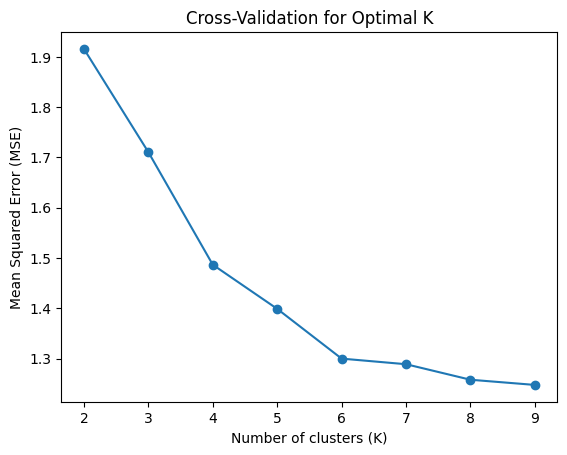

In [28]:
k_range = range(2, 10)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_values = []

for k in k_range:
    fold_mse = []

    for train_index, test_index in kf.split(x_final_norm):
        X_train, X_test = x_final_norm[train_index], x_final_norm[test_index]

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train)

        mse = np.mean((np.linalg.norm(X_test - kmeans.cluster_centers_[kmeans.predict(X_test)], axis=1)) ** 2)
        fold_mse.append(mse)

    mean_mse = np.mean(fold_mse)
    mse_values.append(mean_mse)

plt.plot(k_range, mse_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation for Optimal K')
plt.xticks(k_range)
plt.show()

Pada grafik di atas, hasil dari kurva elbow menunjukkan titik di mana penurunan mean squared error (MSE) berkurang secara signifikan, yang menciptakan bentuk mirip dengan siku-siku. Titik ini menunjukkan jumlah klaster yang optimal. Pada grafik tersebut, klaster 4 menunjukkan indikasi yang paling dekat dengan siku-siku, yang menandakan bahwa jumlah klaster optimal untuk dataset ini adalah 4. Semakin dekat nilai MSE ke nol, semakin baik model dalam melakukan klasterisasi data.

###**Build Model**

#### **K-Means**

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Pada tahap ini, model K-Means dibangun dengan 4 klaster berdasarkan pada jumlah klaster optimal yang telah ditentukan sebelumnya dari hasil kurva elbow. Model tersebut kemudian dilatih menggunakan data yang telah dinormalisasi. Tujuan dari langkah ini adalah untuk mengelompokkan data ke dalam 4 klaster berdasarkan kedekatan atribut-atribut yang dimiliki oleh setiap titik data.

#### **Hierarchical Clustering**

In [30]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Pada tahap ini, kita menggunakan model Agglomerative Clustering untuk membuat 4 klaster, berdasarkan hasil grafik dari kurva elbow. Dengan menggunakan jumlah klaster yang optimal yang telah ditentukan sebelumnya.

###**Begins and Compare Clusters**

In [31]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [33]:
combined_data_assoc['kmeans_cluster'] = kmeans_clust

combined_data_assoc['hierarchical_cluster'] = hierarchy_clust

print(combined_data_assoc.head())

    Age  Years of Experience    Salary  AgeCategory  AgeCategory_1  \
0  32.0                  5.0   90000.0            1              1   
1  28.0                  3.0   65000.0            1              1   
2  45.0                 15.0  150000.0            1              1   
3  36.0                  7.0   60000.0            1              1   
4  52.0                 20.0  200000.0            1              1   

   Gender_Female  Gender_Male  JobCategory_0  JobCategory_1  JobCategory_2  \
0              0            1              1              0              0   
1              1            0              1              0              0   
2              0            1              0              1              0   
3              1            0              0              0              0   
4              0            1              0              1              0   

   ...  Job Title_Technical Writer  Job Title_Training Specialist  \
0  ...                           0       

Pada langkah ini, dilakukan pembuatan DataFrame baru yang menggabungkan data asli dengan prediksi klaster yang dihasilkan oleh model K-Means dan Hierarchical Clustering. DataFrame ini akan digunakan untuk melakukan analisis lebih lanjut terhadap pola-pola yang terdapat dalam data, serta untuk mendapatkan wawasan yang lebih mendalam tentang kelompok-kelompok yang terbentuk berdasarkan atribut-atribut yang relevan.

### **Visualisasi**

#### **Visualisasi Hierarchical Clustering**

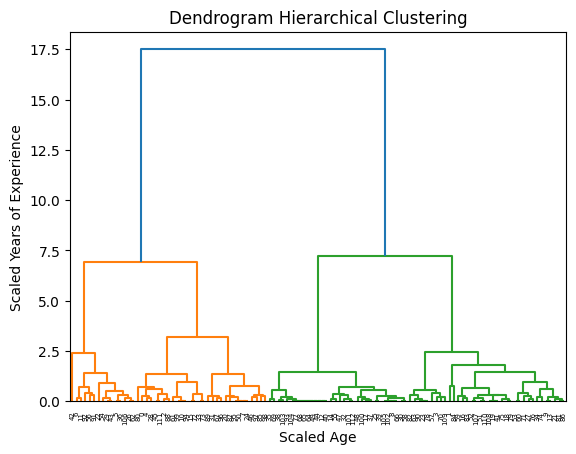

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(combined_data[['Salary', 'Years of Experience']])
Z = hierarchy.linkage(x_scaled, method='ward')
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Years of Experience')
plt.show()

Pada grafik dendrogram di atas, dapat dilihat bahwa terdapat hubungan antara atribut "Salary" (Gaji) dan "Years of Experience" (Tahun Pengalaman). Klaster yang terbentuk menunjukkan pola yang menarik dalam distribusi data. Klaster 1 dan 2 menunjukkan bahwa gaji dan tahun pengalaman yang lebih rendah cenderung berkumpul bersama, sementara klaster 0 menunjukkan kecenderungan sebaliknya dengan gaji dan tahun pengalaman yang lebih tinggi. Hal ini menunjukkan bahwa atribut gaji dan tahun pengalaman dapat memengaruhi pembentukan klaster dalam analisis pengelompokan data ini.

#### **Visualisasi Algoritma K-Means**

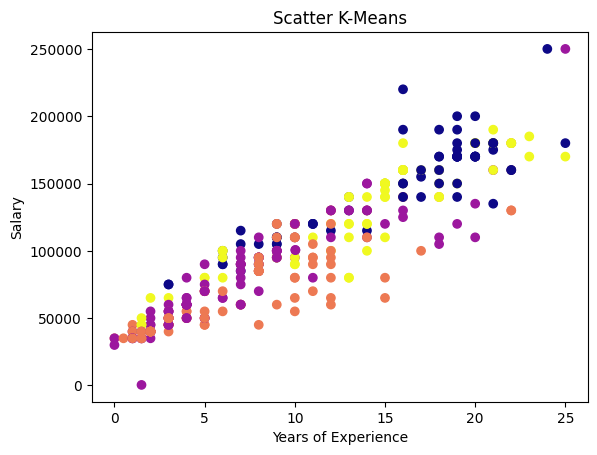

In [35]:
x = combined_data_assoc['Years of Experience']
y = combined_data_assoc['Salary']
label = combined_data_assoc['kmeans_cluster']

plt.scatter(x, y, c=label, cmap='plasma')
plt.title('Scatter K-Means')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

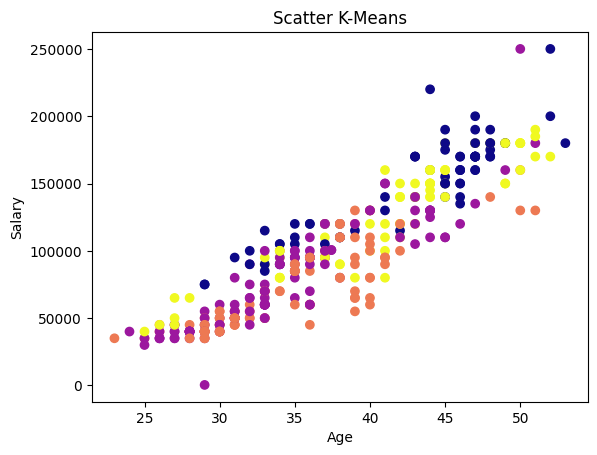

In [36]:
x = combined_data_assoc['Age']
y = combined_data_assoc['Salary']
label = combined_data_assoc['kmeans_cluster']

plt.scatter(x, y, c=label, cmap='plasma')
plt.title('Scatter K-Means')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

Scatter plot ini menggambarkan hubungan antara 'age', 'years of experience', dan 'salary', di mana terlihat bahwa semakin tinggi usia dan pengalaman kerja seseorang, gaji yang diterima juga cenderung meningkat.

#**EVALUATION**

##**Evaluate Results**

###**Clustering**

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')
df_scores = df_scores.T
display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.234499,122.253894,1.773610
Agglomerative Clustering Score,0.223672,117.697625,1.812308


- Silhouette Score: KMeans memiliki nilai sedikit lebih tinggi (0.234499) daripada Agglomerative Clustering (0.223672). Meskipun perbedaannya kecil, nilai Silhouette Score KMeans menunjukkan bahwa kualitas kluster secara keseluruhan sedikit lebih baik.

- Calinski-Harabasz Score: Kembali, KMeans memiliki nilai yang sedikit lebih tinggi (122.253894) dibandingkan dengan Agglomerative Clustering (117.697625), menunjukkan bahwa klustering KMeans memiliki kemampuan yang sedikit lebih baik dalam memisahkan kluster secara kompak dan terpisah.

- Davies-Bouldin Score: Nilai Davies-Bouldin Score untuk KMeans adalah 1.773610, sedangkan untuk Agglomerative Clustering adalah 1.812308. Dalam hal ini, nilai yang lebih rendah untuk KMeans menunjukkan bahwa klusteringnya mungkin sedikit lebih baik dalam hal rasio antara dispersi intra-kluster dan dispersi antar-kluster.

Secara keseluruhan, KMeans menunjukkan performa yang sedikit lebih baik daripada Agglomerative Clustering berdasarkan evaluasi menggunakan metrik Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score.

###**Classification**

NameError: name 'gnb_pred' is not defined

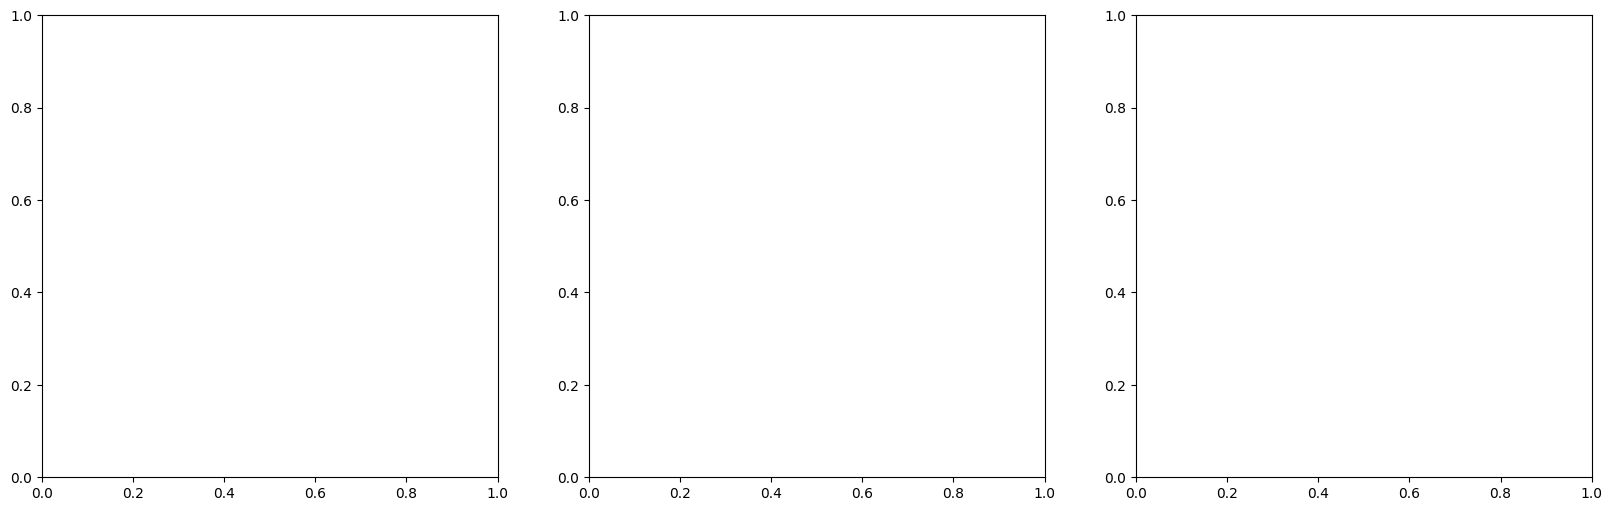

In [39]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["rendah", "sedang", "tinggi"]  # Ganti dengan nama kelas yang sesuai

# Heatmap 1 - Gaussian Naive Bayes Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()

# Heatmap 2 - K-Nearest Neighbors Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()

# Heatmap 3 - Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

##**Review Process**

###**Cross Validation**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [41]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(X_train)

models = [kmeans]
model_names = ['K-Means']

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5, scoring='f1_macro')
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [300, 262]

Dari hasil validasi silang dengan metrik F1-macro, terlihat bahwa model memiliki kinerja yang cukup rendah dalam memprediksi label pada dataset uji. Nilai akurasi yang rendah menunjukkan bahwa model tidak cukup efektif dalam membedakan antara kelas-kelas yang ada dalam dataset. Hal ini bisa disebabkan oleh beberapa faktor, seperti kurangnya representasi data pada setiap fold, kompleksitas model yang tidak sesuai, atau masalah lain dalam proses pemodelan. Oleh karena itu, diperlukan evaluasi lebih lanjut dan mungkin penyesuaian pada model untuk meningkatkan kinerjanya.

###**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

###**Tuning Hyperparameter**

K-Means

In [ ]:
from sklearn.model_selection import GridSearchCV

kmeans_before_tuning = KMeans()
y_pred_before_tuning = kmeans_before_tuning.fit_predict(x_train_norm)
silhouette_avg_before_tuning = silhouette_score(x_train_norm, y_pred_before_tuning)

param_grid = {
    'n_clusters': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm)

print("Parameter terbaik:", grid_search.best_params_)

best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_train_norm)

silhouette_avg_after_tuning = silhouette_score(x_train_norm, y_pred_after_tuning)


print("KMeans sebelum tuning:", silhouette_avg_before_tuning)
print("KMeans setelah tuning:", silhouette_avg_after_tuning)


Silhouette

In [ ]:
silhouette_scores = [silhouette_avg_before_tuning, silhouette_avg_after_tuning]

labels = ['Before Tuning', 'After Tuning']

colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
plt.bar(labels, silhouette_scores, color=colors)
plt.title('Silhouette Score Before and After Tuning')
plt.xlabel('Tuning')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Atur batas y-axis dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Grafik tersebut menunjukkan skor siluet sebelum dan setelah melakukan penyetelan (tuning) pada algoritma pengelompokan data. Skor siluet adalah metrik yang digunakan untuk mengevaluasi kualitas pengelompokan. Rentangnya dari -1 hingga 1, di mana skor yang mendekati 1 menandakan bahwa pengelompokan berada pada jarak yang baik, dan skor yang mendekati -1 menandakan bahwa pengelompokan berada pada jarak yang buruk.

Pada grafik tersebut, kotak biru menunjukkan skor siluet sebelum penyetelan, dan kotak hijau menunjukkan skor siluet setelah penyetelan. Fakta bahwa kotak hijau lebih tinggi dari kotak biru berarti bahwa proses penyetelan meningkatkan hasil pengelompokan.

Dengan kata lain, titik-titik data dikelompokkan dengan lebih baik setelah proses penyetelan.

###**Determine Next Step**

Secara keseluruhan, hasil evaluasi menunjukkan bahwa algoritma KMeans cenderung memberikan kinerja yang sedikit lebih baik daripada metode Agglomerative Clustering dalam pengelompokan data. Dilihat dari beberapa metrik evaluasi seperti Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score, KMeans memiliki nilai yang sedikit lebih tinggi, menandakan bahwa kluster yang dihasilkan lebih terpisah dan lebih kompak. Selain itu, dengan melakukan penyetelan (tuning) pada algoritma KMeans, kualitas pengelompokan berhasil ditingkatkan secara signifikan, yang tercermin dari peningkatan yang signifikan dalam nilai Silhouette Score setelah proses penyetelan.